# Comparing two classifiers

The choice of a [statistical hypothesis test](https://machinelearningmastery.com/statistical-hypothesis-tests/) is a challenging open problem for interpreting machine learning results.

Model Evaluation is the subsidiary part of the model development process. It is the phase that is decided whether the model performs better. Therefore, it is critical to consider the model outcomes according to every possible evaluation method. Applying different methods can provide different perspectives.

One of the mistakes while evaluating the classification model is considering only the true cases. It means that looking for only how the model estimates actual cases correctly. Therefore, when the results are unsatisfactory, people try to apply different methods or different variations to get the result that makes them satisfied, without considering the main reason for that result. It shouldn’t be forgotten the accuracy also depends on the false predictions as much as it depends on the true predictions. Thus, false predictions also have to be taken into consideration before rendering a certain verdict. These are the predictions which we want to be as minimum as possible. The metrics called Recall and Precision slightly explain the performance of the positive classes (or negative) by considering the false cases too. But, what I try to say is, the false positives and the false negatives should be compared like they are compared for the true cases. This is where the McNemar test should be used for obtaining a probability of difference between the cases of false negative and false positives.

McNemar’s test is applied to $2\times 2$ contingency tables to find whether row and column marginal frequencies are equal for paired samples. What row and column marginal frequencies mean for confusion matrices is the number of false predictions for both positive and negative classes. It uses the Chi-Square distribution to determine the probability of difference.

![mcnemar](https://media.githubusercontent.com/media/mariolpantunes/ml101/main/figs/mcnemar.png)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import matthews_corrcoef

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
y_pred_lr = clf.predict(X_test)
m = matthews_corrcoef(y_test, y_pred_lr)
print(f'LR MCC {m}')

# Naive Bayes
clf = GaussianNB().fit(X_train, y_train)
y_pred_nb = clf.predict(X_test)
m = matthews_corrcoef(y_test, y_pred_nb)
print(f'NB MCC {m}')

# SVM
clf = SVC(probability=True, kernel='linear').fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)
m = matthews_corrcoef(y_test, y_pred_svm)
print(f'SVM MCC {m}')

LR MCC 0.9515873026942034
NB MCC 0.9515873026942034
SVM MCC 1.0


<Axes: >

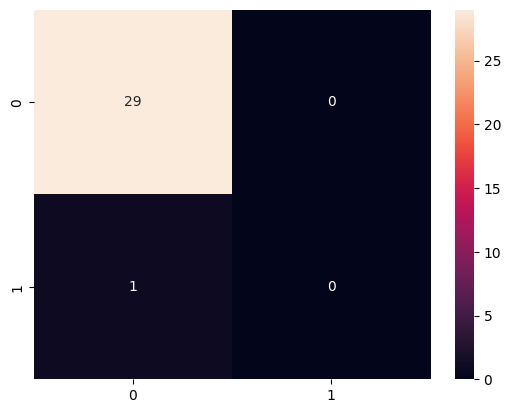

In [3]:
tb = mcnemar_table(y_target=y_test, y_model1=y_pred_nb, y_model2=y_pred_svm)
sns.heatmap(tb, annot=True)

In [4]:
chi2, p = mcnemar(ary=tb, exact=True)
print('chi-squared:', chi2)
print('p-value:', p)

alpha = 0.05

if p < alpha:
  print('The models are significantly different')
else:
  print('The models are similar')

chi-squared: None
p-value: 1.0
The models are similar
